<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

In [ ]:
rainyday_mth = pd.read_csv("../data/rainfall-monthly-number-of-rain-days.csv")
# the number of rainy days per month on the monthly basis since january 1982

rainvolume_mth = pd.read_csv("../data/rainfall-monthly-total.csv")
# the average volume of rain in mililitre per day on the monthly basis since january 1982

rainhighestday_mth = pd.read_csv("../data/RainfallMonthlyHighestDailyTotal.csv")
# the volume of rain in mililitre of the highest rainfall day in a month on the monthly basis since january 1982

trans_ridership_yr = pd.read_csv("../data/PublicTransportUtilisationAveragePublicTransportRidership.csv")
# the number of passenger ridershiop by mode of transportation (mrt, lrt, bus, taxi) since 1995

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

The main passenger transport in Singapore comprises of the public bus, train system and taxis. A major form of transportation is rail: The Mass Rapid Transit (MRT) which now has more than 140 stations across six lines, and the Light Rail Transit (LRT) with 41 stations across three lines. The bus system is currently operated by four companies offering different types of transport services such as midnight bus service and feeder bus services that connects passengers within an estate. Currently, there are six taxi operators, and the taxis can be flagged along the street, at designated taxi stands or booked online.

Average number of passengers per day using public transport in Singapore is 6.39 millions passengers which are almost 100% of population.

Weather especially rain have great impact on the usage on public transportation.

The objective of this report is to help audiences working in areas of public transport to be able forecast the demand on public transportation better, given by the number of rainy days and the rain volume, hence being able handling its capacity better, or even adjust for better services 

In this report, we will address the problems of singapore in the following areas
 - What are the trends of rainy days and rain volumme across the years?
 - What are the trends of public transport usage acorss mode of transportation?
 - Does the rainy days and rain volumes have impact on demand for public transport across mode of trasnportation? 
 - What are recommendation possible from the finding above?
 

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

In [77]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#additional data
trans_ridership_yr = pd.read_csv("../data/PublicTransportUtilisationAveragePublicTransportRidership.csv")

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [78]:
# Code:

def manual_mean(x):
    return sum(x)/len(x)


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [79]:
# Code:
def manual_std(x):
    try:
        std_div = 0
        mean = (sum(x)/len(x))
        for i in x:
            div = (i - mean)**2
            sum_div = std_div + div
        return (sum_div/len(x))**0.5
    except:
        return None
    

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [80]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#provided data
rainyday_mth = pd.read_csv("../data/rainfall-monthly-number-of-rain-days.csv")
rainvolume_mth = pd.read_csv("../data/rainfall-monthly-total.csv")
rainhighestday_mth = pd.read_csv("../data/RainfallMonthlyHighestDailyTotal.csv")

#additional data
trans_ridership_yr = pd.read_csv("../data/PublicTransportUtilisationAveragePublicTransportRidership.csv")


## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [81]:
# based on our problem statement,
#we are going to check the data and then combine following 4 datasets into 1 datasets with year summary for each row
    # rainyday_mth
    # rainvolume_mth
    # rainhighestday_mth
    # trans_ridership_yr

# There are 5 steps in this data processing

# step 1) check data based on the guideline 1-3

# step 2) transform these following 3 datasets from month summary datasets into year summary datasets
    # rainyday_mth --> rainyday_year
    # rainvolume_mth --> rainvolume_yr
    # rainhighestday_mth --> rainvolume_yr
    
# step 3) combine these 3 datasets above into one dataset with year as key 
    # rain_yr_join
    
# step 4) transform "trans_ridership_yr" data set by pivoting values into attributes and summarizing into year summary per row
    # trans_ridership_yr --> trans_ridership_yr_join

# step 5) combine "rain_yr_join" data set with "trans_ridership_yr_join" dataset and then filter year before 2000 to handle missing values
    # rain_vs_publictransport

In [82]:
# step 1) check data based on the guideline 1-3
print(type(rainyday_mth))
print("\n")

print(rainyday_mth.shape)
print("\n")

print(rainyday_mth.isnull().sum())
print("\n")

print(rainyday_mth.info())
print("\n")

print(rainyday_mth.head())
print("\n")

print(rainyday_mth.describe())
print("\n")


<class 'pandas.core.frame.DataFrame'>


(488, 2)


month               0
no_of_rainy_days    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB
None


     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10


       no_of_rainy_days
count        488.000000
mean          14.061475
std            4.947394
min            1.000000
25%           11.000000
50%           14.000000
75%           18.000000
max           27.000000




In [83]:
# step 1) check data based on the guideline 1-3

print(type(rainvolume_mth))
print("\n")

print(rainvolume_mth.shape)
print("\n")

print(rainvolume_mth.isnull().sum())
print("\n")

print(rainvolume_mth.info())
print("\n")

print(rainvolume_mth.head())
print("\n")

print(rainvolume_mth.describe())
print("\n")

<class 'pandas.core.frame.DataFrame'>


(488, 2)


month             0
total_rainfall    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB
None


     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2


       total_rainfall
count      488.000000
mean       177.163730
std        113.916029
min          0.200000
25%         93.850000
50%        159.450000
75%        238.075000
max        765.900000




In [84]:
# step 1) check data based on the guideline 1-3

print(type(rainhighestday_mth))
print("\n")

print(rainhighestday_mth.shape)
print("\n")

print(rainhighestday_mth.isnull().sum())
print("\n")

print(rainhighestday_mth.info())
print("\n")

print(rainhighestday_mth.head())
print("\n")

print(rainhighestday_mth.describe())
print("\n")

<class 'pandas.core.frame.DataFrame'>


(499, 2)


month                        0
maximum_rainfall_in_a_day    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      499 non-null    object 
 1   maximum_rainfall_in_a_day  499 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
None


     month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0


       maximum_rainfall_in_a_day
count                 499.000000
mean                   52.596192
std                    35.754402
min                     0.200000
25%                    31.000000
50%                    44.000000
75%                    6

In [85]:
# step 1) check data based on the guideline 1-3

print(type(trans_ridership_yr))
print("\n")

print(trans_ridership_yr.shape)
print("\n")

print(trans_ridership_yr.isnull().sum())
print("\n")

print(trans_ridership_yr.info())
print("\n")

print(trans_ridership_yr.head())
print("\n")

print(trans_ridership_yr.describe())
print("\n")

<class 'pandas.core.frame.DataFrame'>


(88, 3)


year                        0
type_of_public_transport    0
average_ridership           0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year                      88 non-null     int64 
 1   type_of_public_transport  88 non-null     object
 2   average_ridership         88 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB
None


   year type_of_public_transport  average_ridership
0  1995                      MRT             740000
1  1995                      LRT                  0
2  1995                      Bus            3009000
3  1995                     Taxi                  0
4  1996                      MRT             850000


              year  average_ridership
count    88.000000       8.800000e+01
mean   2005.500000       1

In [86]:
# step 2) transform these following 3 datasets from month summary datasets into year summary datasets
    # rainyday_mth --> rainyday_year
    # rainvolume_mth --> rainvolume_yr
    # rainhighestday_mth --> rainvolume_yr

def year_extract(x):
    return x[:4]

rainvolume_mth['year'] = rainvolume_mth['month'].map(year_extract)
rainyday_mth['year'] = rainyday_mth['month'].map(year_extract)
rainhighestday_mth['year'] = rainhighestday_mth['month'].map(year_extract)

print("rainyday_mth['year']")
print(rainyday_mth['year'].value_counts().head(1))
print(rainyday_mth['year'].value_counts().tail(1))
print(rainyday_mth.columns)
print("\n")

print("rainvolume_mth['year']")
print(rainvolume_mth['year'].value_counts().head(1))
print(rainvolume_mth['year'].value_counts().tail(1))
print(rainvolume_mth.columns)
print("\n")

print("rainhighestday_mth['year']")
print(rainhighestday_mth['year'].value_counts().head(1))
print(rainhighestday_mth['year'].value_counts().tail(1))
print(rainhighestday_mth.columns)
print("\n")
rainyday_yr = rainyday_mth.groupby('year')['no_of_rainy_days'].sum()
rainvolume_yr = rainvolume_mth.groupby('year')['total_rainfall'].sum()
rainhighestday_yr = rainhighestday_mth.groupby('year')['maximum_rainfall_in_a_day'].max()

print("rainyday_yr")
print(rainyday_yr)
print("\n")

print("rainvolume_yr")
print(rainvolume_yr)
print("\n")

print("rainhighestday_yr")
print(rainhighestday_yr)
print("\n")

rainyday_mth['year']
1982    12
Name: year, dtype: int64
2022    8
Name: year, dtype: int64
Index(['month', 'no_of_rainy_days', 'year'], dtype='object')


rainvolume_mth['year']
1982    12
Name: year, dtype: int64
2022    8
Name: year, dtype: int64
Index(['month', 'total_rainfall', 'year'], dtype='object')


rainhighestday_mth['year']
1982    12
Name: year, dtype: int64
2023    7
Name: year, dtype: int64
Index(['month', 'maximum_rainfall_in_a_day', 'year'], dtype='object')


rainyday_yr
year
1982    130
1983    145
1984    191
1985    181
1986    174
1987    151
1988    173
1989    173
1990    142
1991    146
1992    163
1993    163
1994    160
1995    179
1996    170
1997    116
1998    177
1999    177
2000    188
2001    184
2002    139
2003    186
2004    147
2005    175
2006    174
2007    195
2008    182
2009    166
2010    178
2011    188
2012    191
2013    206
2014    152
2015    125
2016    179
2017    204
2018    188
2019    120
2020    178
2021    182
2022    124
Name: no_of

In [87]:
# step 3) combine these 3 datasets above into one dataset with year as key 
    # rain_yr_join
rain_yr_join = pd.DataFrame({'rainydays':rainyday_yr,"rainvolume":rainvolume_yr,'rainhighestday':rainhighestday_yr}).reset_index()
rain_yr_join['year'] = rain_yr_join['year'].astype(int)
rain_yr_join

,year,rainydays,rainvolume,rainhighestday
0,1982,130.0,1581.7,109.0
1,1983,145.0,1993.7,181.8
2,1984,191.0,2686.7,154.4
3,1985,181.0,1483.9,86.8
4,1986,174.0,2536.1,131.7
5,1987,151.0,2102.8,127.4
6,1988,173.0,2598.6,187.3
7,1989,173.0,2463.2,148.6
8,1990,142.0,1523.8,153.7
9,1991,146.0,1877.0,129.9


In [88]:
# step 4) transform "trans_ridership_yr" data set by pivoting values into attributes and summarizing into year summary per row
    # trans_ridership_yr --> trans_ridership_yr_join

trans_ridership_yr_sum = trans_ridership_yr.groupby('year')['average_ridership'].sum().reset_index()
trans_ridership_yr_sum.rename(columns={'average_ridership': 'all_mode_ridership'}, inplace=True)

MRT_ridership_yr = trans_ridership_yr[trans_ridership_yr['type_of_public_transport'] == 'MRT']
MRT_ridership_yr.drop('type_of_public_transport', axis=1, inplace=True)
MRT_ridership_yr.rename(columns={'average_ridership': 'mrt_ridership'}, inplace=True)

LRT_ridership_yr = trans_ridership_yr[trans_ridership_yr['type_of_public_transport'] == 'LRT']
LRT_ridership_yr.drop('type_of_public_transport', axis=1, inplace=True)
LRT_ridership_yr.rename(columns={'average_ridership': 'lrt_ridership'}, inplace=True)

Bus_ridership_yr = trans_ridership_yr[trans_ridership_yr['type_of_public_transport'] == 'Bus']
Bus_ridership_yr.drop('type_of_public_transport', axis=1, inplace=True)
Bus_ridership_yr.rename(columns={'average_ridership': 'bus_ridership'}, inplace=True)

Taxi_ridership_yr = trans_ridership_yr[trans_ridership_yr['type_of_public_transport'] == 'Taxi']
Taxi_ridership_yr.drop('type_of_public_transport', axis=1, inplace=True)
Taxi_ridership_yr.rename(columns={'average_ridership': 'taxi_ridership'}, inplace=True)

print(trans_ridership_yr_sum)
print(MRT_ridership_yr)
print(LRT_ridership_yr)
print(Bus_ridership_yr)
print(Taxi_ridership_yr)

trans_ridership_yr_join = MRT_ridership_yr.set_index('year').join(LRT_ridership_yr.set_index('year')).join(Bus_ridership_yr.set_index('year')).join(Taxi_ridership_yr.set_index('year')).join(trans_ridership_yr_sum.set_index('year')).reset_index()
trans_ridership_yr_join


    year  all_mode_ridership
0   1995             3749000
1   1996             3968000
2   1997             4027000
3   1998             4067000
4   1999             4226000
5   2000             4337000
6   2001             5273000
7   2002             5156000
8   2003             5018000
9   2004             4982000
10  2005             5149000
11  2006             5261000
12  2007             5482000
13  2008             5782000
14  2009             5779000
15  2010             6280000
16  2011             6724000
17  2012             7097000
18  2013             7323000
19  2014             7670000
20  2015             7933000
21  2016             8168000
    year  mrt_ridership
0   1995         740000
4   1996         850000
8   1997         911000
12  1998         946000
16  1999         986000
20  2000        1047000
24  2001        1071000
28  2002        1081000
32  2003        1171000
36  2004        1270000
40  2005        1321000
44  2006        1408000
48  2007        15270

C:\Users\HP\AppData\Local\Temp\ipykernel_26692\1900681580.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MRT_ridership_yr.drop('type_of_public_transport', axis=1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_26692\1900681580.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MRT_ridership_yr.rename(columns={'average_ridership': 'mrt_ridership'}, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_26692\1900681580.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,year,mrt_ridership,lrt_ridership,bus_ridership,taxi_ridership,all_mode_ridership
0,1995,740000,0,3009000,0,3749000
1,1996,850000,0,3118000,0,3968000
2,1997,911000,0,3116000,0,4027000
3,1998,946000,0,3121000,0,4067000
4,1999,986000,27000,3213000,0,4226000
5,2000,1047000,39000,3251000,0,4337000
6,2001,1071000,41000,3281000,880000,5273000
7,2002,1081000,39000,3197000,839000,5156000
8,2003,1171000,50000,2992000,805000,5018000
9,2004,1270000,55000,2805000,852000,4982000


In [89]:
# step 5) combine "rain_yr_join" data set with "trans_ridership_yr_join" dataset, and then filter year before 2000 to handle missing values
    # rain_vs_publictransport
    # rain_vs_publictransport_start2001

rain_vs_publictransport = rain_yr_join.merge(trans_ridership_yr_join, how='inner', on='year')
print(rain_vs_publictransport)
rain_vs_publictransport_start2001 = rain_vs_publictransport[rain_vs_publictransport['year']>2000]
rain_vs_publictransport_start2001


    year  rainydays  rainvolume  rainhighestday  mrt_ridership  lrt_ridership  \
0   1995      179.0      2332.6           198.6         740000              0   
1   1996      170.0      2418.0            94.3         850000              0   
2   1997      116.0      1118.9            65.8         911000              0   
3   1998      177.0      2623.1            84.4         946000              0   
4   1999      177.0      2134.0            76.9         986000          27000   
5   2000      188.0      2370.5           127.6        1047000          39000   
6   2001      184.0      2783.1           211.1        1071000          41000   
7   2002      139.0      1748.9            84.0        1081000          39000   
8   2003      186.0      2391.2           194.4        1171000          50000   
9   2004      147.0      2136.4           177.8        1270000          55000   
10  2005      175.0      1930.7           133.8        1321000          69000   
11  2006      174.0      275

,year,rainydays,rainvolume,rainhighestday,mrt_ridership,lrt_ridership,bus_ridership,taxi_ridership,all_mode_ridership
6,2001,184.0,2783.1,211.1,1071000,41000,3281000,880000,5273000
7,2002,139.0,1748.9,84.0,1081000,39000,3197000,839000,5156000
8,2003,186.0,2391.2,194.4,1171000,50000,2992000,805000,5018000
9,2004,147.0,2136.4,177.8,1270000,55000,2805000,852000,4982000
10,2005,175.0,1930.7,133.8,1321000,69000,2779000,980000,5149000
11,2006,174.0,2753.2,198.0,1408000,74000,2833000,946000,5261000
12,2007,195.0,2886.2,159.0,1527000,79000,2932000,944000,5482000
13,2008,182.0,2325.1,133.9,1698000,88000,3087000,909000,5782000
14,2009,166.0,1920.9,86.6,1782000,90000,3047000,860000,5779000
15,2010,178.0,2075.1,121.1,2069000,100000,3199000,912000,6280000


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

Dataset                |Feature                            |Type    |Description                               |Example       
-----------------------|-----------------------------------|--------|------------------------------------------|--------------
rainyday_mth           |month                              |string  |year-month                                |1982-01       
rainyday_mth           |no_of_rainy_days                   |int     |total number of rainy days in month       |10             
rainhighestday_mth     |month                              |string  |year-month                                |1982-01
rainhighestday_mth     |maximum_rainfall_in_a_day          |float   |max rainfall in mililitre per day in month|36.5
rainvolume_mth         |month                              |string  |year-month                                |1982-01       
rainvolume_mth         |total_rainfall                     |float   |total rainfall in mililitre in month      |107.1         
trans_ridership_yr     |year                               |int     |year                                      |1996
trans_ridership_yr     |type_of_public_transport           |string  |type of public transportaion              |mrt,lrt,bus,taxi 
trans_ridership_yr     |average_ridership                  |int     |Thousand Passenger Trips Per Day          |740000
rain_vs_publictransport|year                               |int     |year                                      |2001     
rain_vs_publictransport|rainydays                          |float   |average rainy days per month              |0.504110     
rain_vs_publictransport|rainvolume                         |float   |average rain in ml.litire Per Day         |7.624932     
rain_vs_publictransport|rainhighestday                     |float   |rain in ml.litire in the highest rain day |211.1     
rain_vs_publictransport|mrt_ridership                      |float   |average mrt 1000 Passenger Trips Per Day  |1071000     
rain_vs_publictransport|lrt_ridership                      |float   |average lrt 1000 Passenger Trips Per Day  |41000     
rain_vs_publictransport|bus_ridership                      |float   |average bus 1000 Passenger Trips Per Day  |3281000     
rain_vs_publictransport|taxi_ridership                     |float   |average taxi 1000 Passenger Trips Per Day |880000     
rain_vs_publictransport|all_mode_ridership                 |float   |average all 1000 Passenger Trips Per Day  |5273000     



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [90]:
# 1. Summary Statistics.

print(rainyday_mth.describe())
print(rainhighestday_mth.describe())
print(rainvolume_mth.describe())
print(trans_ridership_yr.describe())
print(rain_vs_publictransport_start2001.describe())


       no_of_rainy_days
count        488.000000
mean          14.061475
std            4.947394
min            1.000000
25%           11.000000
50%           14.000000
75%           18.000000
max           27.000000
       maximum_rainfall_in_a_day
count                 499.000000
mean                   52.596192
std                    35.754402
min                     0.200000
25%                    31.000000
50%                    44.000000
75%                    63.250000
max                   216.200000
       total_rainfall
count      488.000000
mean       177.163730
std        113.916029
min          0.200000
25%         93.850000
50%        159.450000
75%        238.075000
max        765.900000
              year  average_ridership
count    88.000000       8.800000e+01
mean   2005.500000       1.402852e+06
std       6.380646       1.282344e+06
min    1995.000000       0.000000e+00
25%    2000.000000       1.082500e+05
50%    2005.500000       9.670000e+05
75%    2011.000000     

In [91]:
# 2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.

print({col : manual_std(rainyday_mth[col]) for col in rainyday_mth.columns})
print({col : manual_std(rainhighestday_mth[col]) for col in rainhighestday_mth.columns})
print({col : manual_std(rainvolume_mth[col]) for col in rainvolume_mth.columns})
print({col : manual_std(trans_ridership_yr[col]) for col in trans_ridership_yr.columns})
print({col : manual_std(rain_vs_publictransport_start2001[col]) for col in rain_vs_publictransport_start2001.columns})


{'month': None, 'no_of_rainy_days': 0.04248501197487039, 'year': None}
{'month': None, 'maximum_rainfall_in_a_day': 0.05354892545697155, 'year': None}
{'month': None, 'total_rainfall': 1.6189479661437212, 'year': None}
{'year': 1.1193037608669547, 'type_of_public_transport': None, 'average_ridership': 47847.813041649184}
{'year': 1.875, 'rainydays': 1.515625, 'rainvolume': 60.20781249999999, 'rainhighestday': 14.759374999999999, 'mrt_ridership': 295984.375, 'lrt_ridership': 21218.75, 'bus_ridership': 169125.0, 'taxi_ridership': 7593.75, 'all_mode_ridership': 493921.875}


In [92]:
# 3. Investigate trends in the data.
#     - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
#         - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
#         - Which year have the highest and lowest total rainfall in the date range of analysis?
#         - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
#         - Which year have the highest and lowest number of rainy days in the date range of analysis?
#         - Are there any outliers months in the dataset?

def year_extract(x):
    return x[:4]

def date_extract(x):
    return x[-2:]

# using custom function to define new dataframe column based on condition check outcome
rainvolume_mth['year'] = rainvolume_mth['month'].map(year_extract)
rainyday_mth['year'] = rainyday_mth['month'].map(year_extract)

print(rainvolume_mth['year'].value_counts())
print(rainyday_mth['year'].value_counts())


1982    12
2003    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2004    12
2002    12
1983    12
2001    12
1984    12
1985    12
1986    12
1987    12
1988    12
1989    12
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2022     8
Name: year, dtype: int64
1982    12
2003    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2004    12
2002    12
1983    12
2001    12
1984    12
1985    12
1986    12
1987    12
1988    12
1989    12
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2022     8
Name: year, dtype: int64


In [93]:
#         - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
print(rainvolume_mth[rainvolume_mth['year']== "1990"].sort_values("total_rainfall",ascending=False).head(1))
print(rainvolume_mth[rainvolume_mth['year']== "2000"].sort_values("total_rainfall",ascending=False).head(1))
print(rainvolume_mth[rainvolume_mth['year']== "2010"].sort_values("total_rainfall",ascending=False).head(1))
print(rainvolume_mth[rainvolume_mth['year']== "2020"].sort_values("total_rainfall",ascending=False).head(1))


       month  total_rainfall  year
104  1990-09           204.5  1990
       month  total_rainfall  year
226  2000-11           385.7  2000
       month  total_rainfall  year
342  2010-07           298.5  2010
       month  total_rainfall  year
460  2020-05           255.6  2020


In [94]:
#  Which year have the highest and lowest total rainfall in the date range of analysis?
print(rainvolume_mth.groupby('year')['total_rainfall'].max().sort_values(ascending=False).head(1))
print(rainvolume_mth.groupby('year')['total_rainfall'].min().sort_values(ascending=False).head(1))

year
2006    765.9
Name: total_rainfall, dtype: float64
year
1996    107.5
Name: total_rainfall, dtype: float64


In [95]:
#  Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
print(rainyday_mth[rainyday_mth['year']== "1990"].sort_values("no_of_rainy_days",ascending=False).head(1))
print(rainyday_mth[rainyday_mth['year']== "2000"].sort_values("no_of_rainy_days",ascending=False).head(1))
print(rainyday_mth[rainyday_mth['year']== "2010"].sort_values("no_of_rainy_days",ascending=False).head(1))
print(rainyday_mth[rainyday_mth['year']== "2020"].sort_values("no_of_rainy_days",ascending=False).head(1))

       month  no_of_rainy_days  year
104  1990-09                17  1990
       month  no_of_rainy_days  year
226  2000-11                21  2000
       month  no_of_rainy_days  year
346  2010-11                21  2010
       month  no_of_rainy_days  year
462  2020-07                22  2020


In [96]:
# Which year have the highest and lowest number of rainy days in the date range of analysis?
print(rainyday_mth.groupby('year')['no_of_rainy_days'].max().sort_values(ascending=False).head(1))
print(rainyday_mth.groupby('year')['no_of_rainy_days'].min().sort_values(ascending=False).head(1))

year
2018    27
Name: no_of_rainy_days, dtype: int64
year
1984    11
Name: no_of_rainy_days, dtype: int64


In [97]:
# Are there any outliers months in the dataset?
# outliers are the any value in the dataset that is more than 2 standard deviation or less than 2 standard deviation

def outlier(number_list):
    outlier_list = []
    upperbound = (number_list.mean()) + ((number_list.std())*2)
    lowerbound = (number_list.mean()) - ((number_list.std())*2)
    for number in number_list:
        if number > upperbound or number < lowerbound:
            outlier_list.append(number)
        else:
            pass

    print(f'mean = {number_list.mean()}')
    print(f'standard deviation = {number_list.std()}')
    print(f'upperbound = {upperbound}')
    print(f'lowerbound = {lowerbound}')
    print(f'outlier list is {outlier_list}')
    print(f'there are {len(outlier_list)} outliers from total {len(number_list)} numbers') 


In [98]:
# 1) outliers in rainyday_mth dataset

print("rainyday_mth['no_of_rainy_days']")
outlier(rainyday_mth['no_of_rainy_days'])
print("\n")

# 2) outliers in rainvolume_mth dataset

print("rainvolume_mth['total_rainfall']")
outlier(rainvolume_mth['total_rainfall'])
print("\n")

# 3) outliers in rainhighestday_mth dataset

print("rainhighestday_mth['maximum_rainfall_in_a_day']")
outlier(rainhighestday_mth['maximum_rainfall_in_a_day'])
print("\n")

# 4) outliers in trans_ridership_yr dataset

print("trans_ridership_yr['average_ridership']")
outlier(trans_ridership_yr['average_ridership'])
print("\n")

# 5) outliers in rain_vs_publictransport_start2001 dataset

print("rain_vs_publictransport_start2001['all_mode_ridership']")
outlier(rain_vs_publictransport_start2001['all_mode_ridership'])
print("\n")

print("rain_vs_publictransport_start2001['mrt_ridership']")
outlier(rain_vs_publictransport_start2001['mrt_ridership'])
print("\n")

print("rain_vs_publictransport_start2001['lrt_ridership']")
outlier(rain_vs_publictransport_start2001['lrt_ridership'])
print("\n")

print("rain_vs_publictransport_start2001['bus_ridership']")
outlier(rain_vs_publictransport_start2001['bus_ridership'])
print("\n")

print("rain_vs_publictransport_start2001['taxi_ridership']")
outlier(rain_vs_publictransport_start2001['taxi_ridership'])
print("\n")


rainyday_mth['no_of_rainy_days']
mean = 14.061475409836065
standard deviation = 4.947393841903985
upperbound = 23.956263093644033
lowerbound = 4.166687726028096
outlier list is [2, 2, 4, 2, 3, 4, 4, 3, 3, 2, 24, 4, 3, 3, 4, 24, 1, 24, 25, 27, 4, 2, 24]
there are 23 outliers from total 488 numbers


rainvolume_mth['total_rainfall']
mean = 177.1637295081967
standard deviation = 113.91602880233788
upperbound = 404.99578711287245
lowerbound = -50.66832809647906
outlier list is [494.1, 470.4, 568.6, 440.4, 508.4, 492.3, 474.3, 502.7, 425.4, 463.4, 425.8, 609.0, 444.2, 600.9, 454.4, 765.9, 450.1, 468.6, 513.2, 421.5, 692.8]
there are 21 outliers from total 488 numbers


rainhighestday_mth['maximum_rainfall_in_a_day']
mean = 52.59619238476954
standard deviation = 35.754401609717085
upperbound = 124.10499560420371
lowerbound = -18.912610834664633
outlier list is [181.8, 164.4, 154.4, 131.7, 127.4, 187.3, 148.6, 153.7, 129.9, 178.3, 133.8, 159.3, 198.6, 127.6, 125.4, 211.1, 194.4, 177.8, 133.8,

In [99]:
# The above 5 questions are compulsory. 
# Feel free to explore other trends based on the datasets that you have choosen for analysis. 
# You should comment on your findings at each step in a markdown cell below your code block**. 
# Make sure you include at least one example of sorting your dataframe by a column, 
# and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#based on the problemstatement, we will explore more the correlation between 
    # - rain (including rainydays, rainvolume, rainghighestday, and 
    # - demand in public transport (mrt_ridership, lrt_ridership, bus_ridership, taxi_ridership, all_mode_ridership)

rain_vs_publictransport_start2001.corr()

,year,rainydays,rainvolume,rainhighestday,mrt_ridership,lrt_ridership,bus_ridership,taxi_ridership,all_mode_ridership
year,1.000000,0.004799,-0.371071,-0.580648,0.984544,0.984731,0.789593,0.722467,0.950809
rainydays,0.004799,1.000000,0.796016,0.469974,-0.005473,0.012016,-0.141721,-0.003830,-0.050901
rainvolume,-0.371071,0.796016,1.000000,0.799012,-0.381312,-0.362243,-0.421143,-0.235393,-0.403945
rainhighestday,-0.580648,0.469974,0.799012,1.000000,-0.573267,-0.571537,-0.562387,-0.394229,-0.586675
mrt_ridership,0.984544,-0.005473,-0.381312,-0.573267,1.000000,0.985491,0.872185,0.706723,0.987347
lrt_ridership,0.984731,0.012016,-0.362243,-0.571537,0.985491,1.000000,0.832218,0.721055,0.966242
bus_ridership,0.789593,-0.141721,-0.421143,-0.562387,0.872185,0.832218,1.000000,0.535603,0.936300
taxi_ridership,0.722467,-0.003830,-0.235393,-0.394229,0.706723,0.721055,0.535603,1.000000,0.699141
all_mode_ridership,0.950809,-0.050901,-0.403945,-0.586675,0.987347,0.966242,0.936300,0.699141,1.000000


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


Text(0.5, 1.0, 'correation between rain and public transport demand')

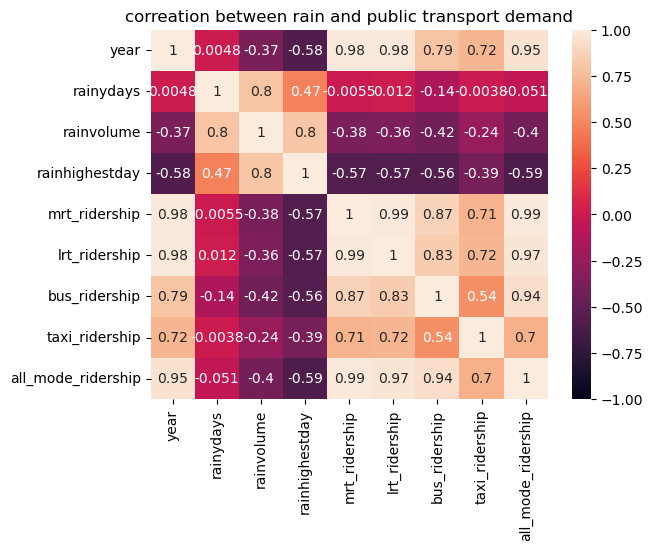

In [100]:
# Code
#1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
sns.heatmap(rain_vs_publictransport_start2001.corr(), annot=True, vmin=-1, vmax=1)
plt.title('correation between rain and public transport demand') 
  

In [101]:
#based on the heatmap above, we can see the negative correlationship between 
    # - rain (including rainydays, rainvolume, rainghighestday, and 
    # - demand in public transport (mrt_ridership, lrt_ridership, bus_ridership, taxi_ridership, all_mode_ridership)
#especially on rainvolume and rainhighestday 


Text(0.5, 1.0, 'histogram rainy days per month')

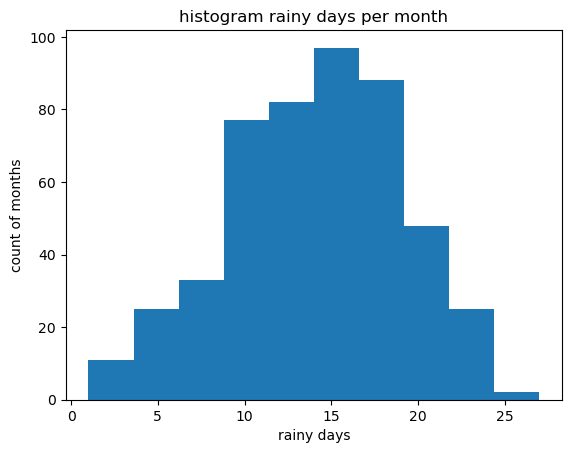

In [102]:
# 2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
plt.hist(rainyday_mth['no_of_rainy_days'], bins = 10)
plt.xlabel("rainy days") 
plt.ylabel("count of months") 
plt.title('histogram rainy days per month') 

Text(0.5, 1.0, 'histogram of maximum rainfall in a day in mililitre')

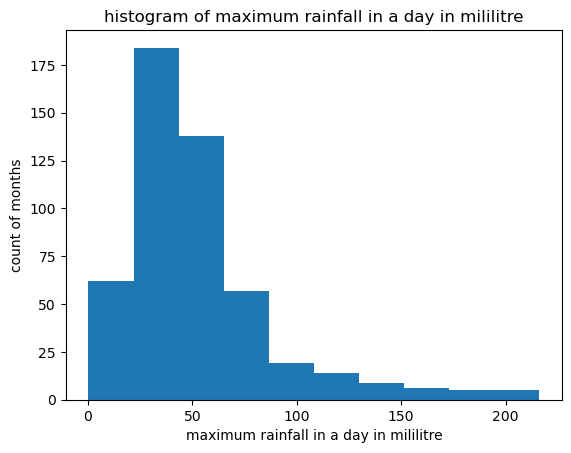

In [103]:
# 2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
plt.hist(rainhighestday_mth['maximum_rainfall_in_a_day'], bins = 10)
plt.xlabel("maximum rainfall in a day in mililitre") 
plt.ylabel("count of months") 
plt.title('histogram of maximum rainfall in a day in mililitre') 

Text(0.5, 1.0, 'histogram of rain volume per day in millilitre')

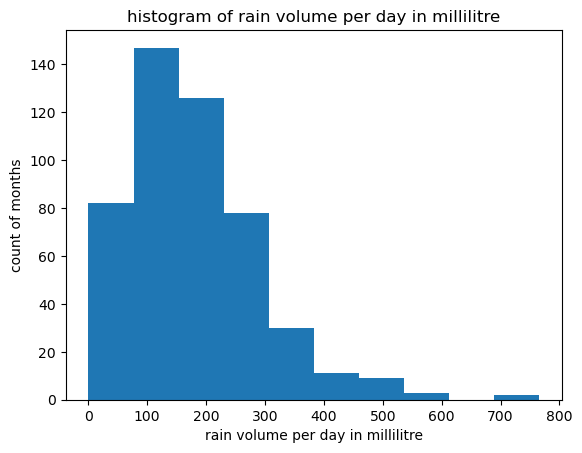

In [104]:
# 2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
plt.hist(rainvolume_mth['total_rainfall'], bins = 10)
plt.xlabel("rain volume per day in millilitre") 
plt.ylabel("count of months") 
plt.title('histogram of rain volume per day in millilitre') 

Text(0.5, 1.0, 'histogram of passenger ridership in million per day')

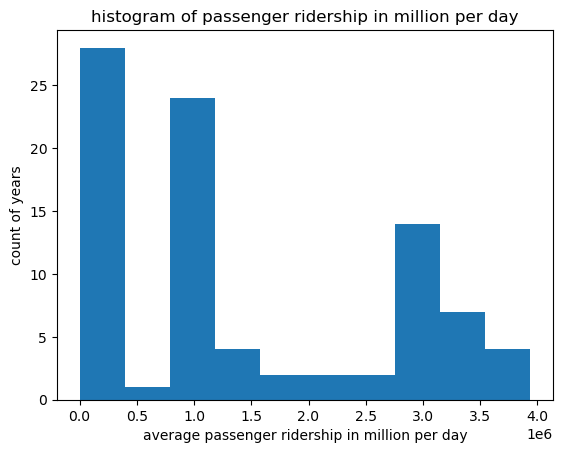

In [105]:
# 2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
plt.hist(trans_ridership_yr['average_ridership'], bins = 10)
plt.xlabel("average passenger ridership in million per day") 
plt.ylabel("count of years") 
plt.title('histogram of passenger ridership in million per day') 

Text(0.5, 1.0, 'boxplot of rainy days per month')

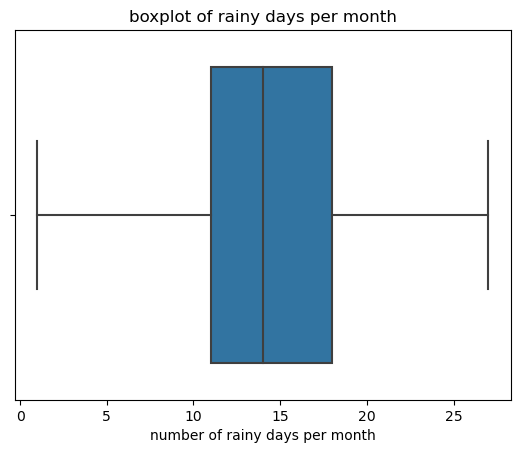

In [106]:
# 3. Plot and interpret boxplots. 
sns.boxplot(data = rainyday_mth, x='no_of_rainy_days')
plt.xlabel("number of rainy days per month") 
plt.title('boxplot of rainy days per month') 


Text(0.5, 1.0, 'boxplot of maximum rainfall in a day in mililitre')

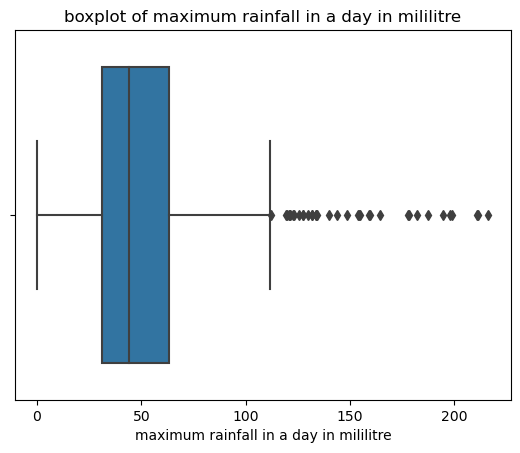

In [107]:
# 3. Plot and interpret boxplots. 
sns.boxplot(data = rainhighestday_mth, x='maximum_rainfall_in_a_day')
plt.xlabel("maximum rainfall in a day in mililitre") 
plt.title('boxplot of maximum rainfall in a day in mililitre') 


Text(0.5, 1.0, 'boxplot of rain volume per day in millilitre')

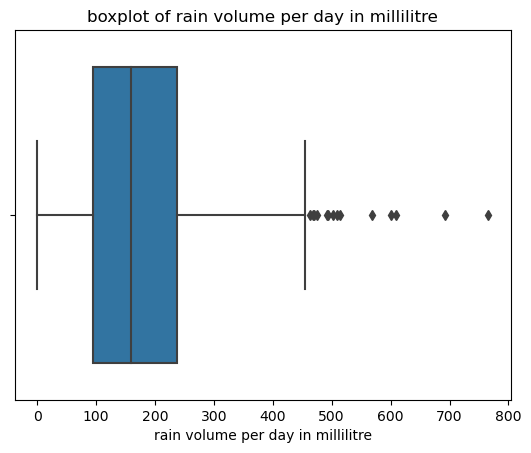

In [108]:
# 3. Plot and interpret boxplots. 
sns.boxplot(data = rainvolume_mth, x='total_rainfall')
plt.xlabel("rain volume per day in millilitre") 
plt.title('boxplot of rain volume per day in millilitre') 


Text(0.5, 1.0, 'boxplot of average passenger ridership in million per day')

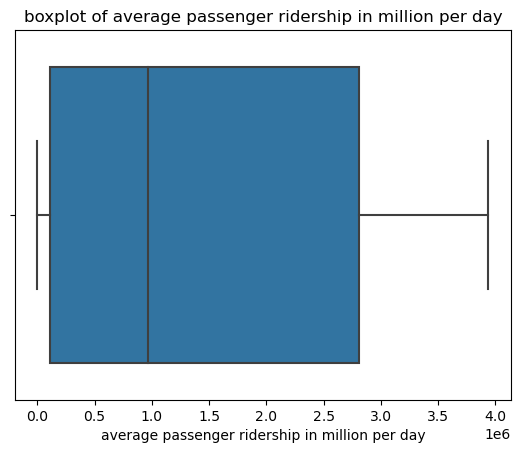

In [109]:
# 3. Plot and interpret boxplots. 
sns.boxplot(data = trans_ridership_yr, x='average_ridership')
plt.xlabel("average passenger ridership in million per day") 
plt.title('boxplot of average passenger ridership in million per day') 

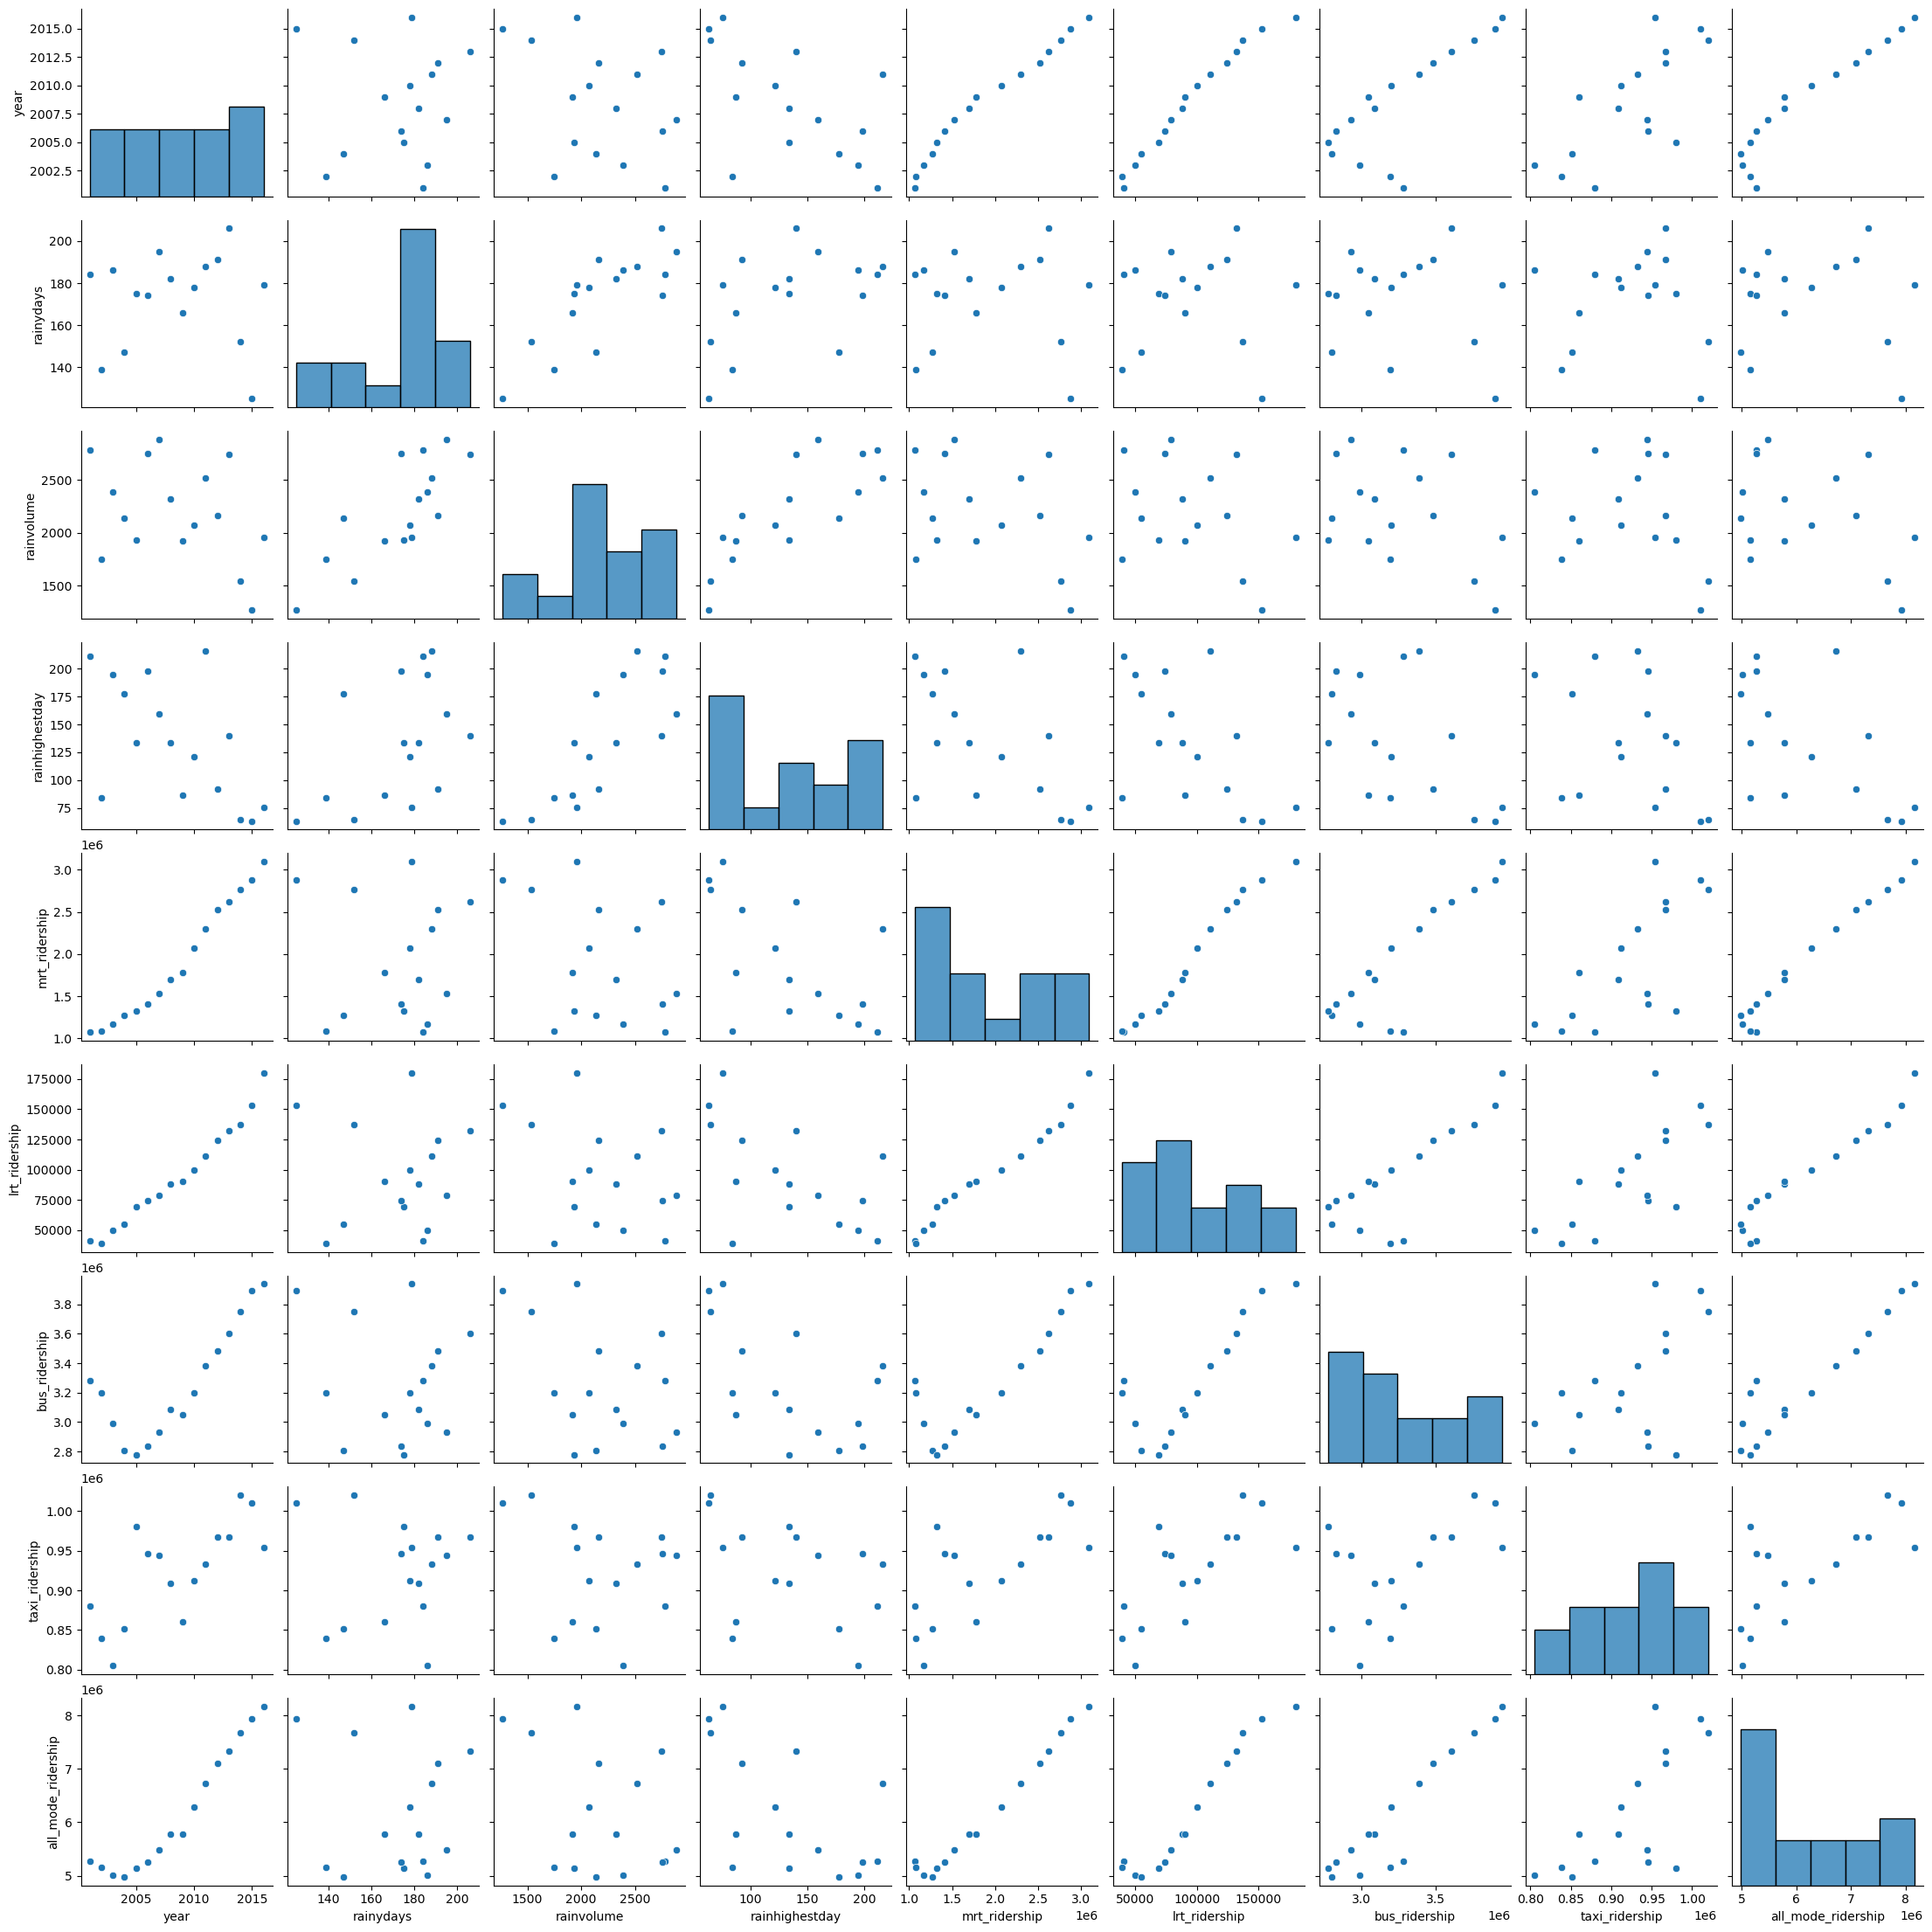

In [120]:
#4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
sns.pairplot(rain_vs_publictransport_start2001)


lrt_ridership      180000
taxi_ridership     954000
mrt_ridership     3095000
bus_ridership     3939000
Name: 21, dtype: int64


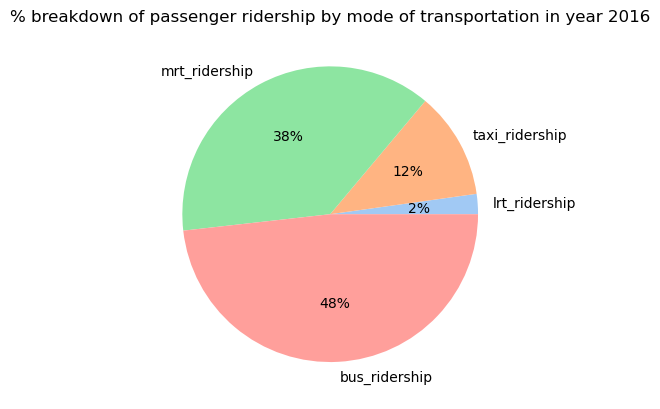

In [116]:
#5. Additional plots of your choosing.

#number of ridership breakdown by mode of transportation

#define data
data_pie = rain_vs_publictransport_start2001[rain_vs_publictransport_start2001['year']==2016][['lrt_ridership','taxi_ridership', 'mrt_ridership', 'bus_ridership']].squeeze()
labels = ['lrt_ridership','taxi_ridership', 'mrt_ridership', 'bus_ridership']
print(data_pie)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data_pie, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('% breakdown of passenger ridership by mode of transportation in year 2016') 
plt.show()

      rainydays
year           
2001      184.0
2002      139.0
2003      186.0
2004      147.0
2005      175.0
2006      174.0
2007      195.0
2008      182.0
2009      166.0
2010      178.0
2011      188.0
2012      191.0
2013      206.0
2014      152.0
2015      125.0
2016      179.0


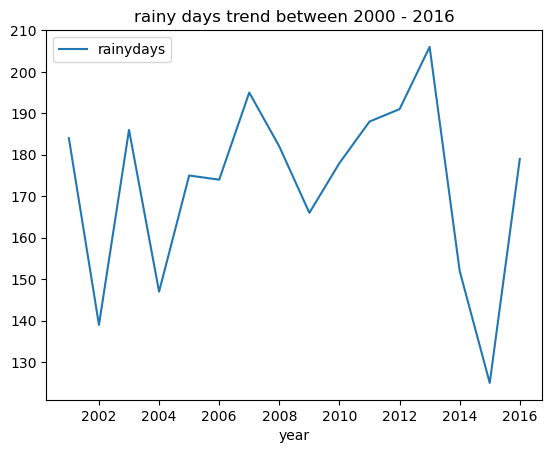

In [122]:
#5. Additional plots of your choosing.

#line plot showing the trend of each mode of transportation from 2001 to 2016
data_lines = rain_vs_publictransport_start2001[['year','rainydays']].set_index("year")
print(data_lines)

#plot sales of each store with custom colors
sns.lineplot(data=data_lines)
plt.title('rainy days trend between 2000 - 2016') 
plt.show()

      rainvolume  rainhighestday
year                            
2001      2783.1           211.1
2002      1748.9            84.0
2003      2391.2           194.4
2004      2136.4           177.8
2005      1930.7           133.8
2006      2753.2           198.0
2007      2886.2           159.0
2008      2325.1           133.9
2009      1920.9            86.6
2010      2075.1           121.1
2011      2524.2           216.2
2012      2159.9            92.3
2013      2748.4           139.8
2014      1538.4            64.4
2015      1267.1            63.2
2016      1955.7            75.4


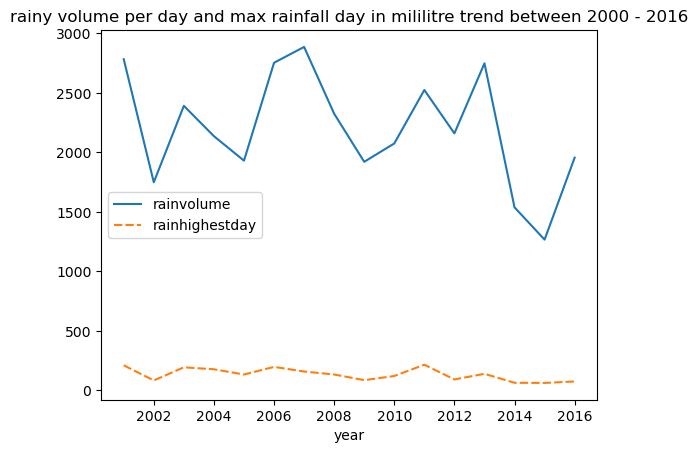

In [123]:
#5. Additional plots of your choosing.

#line plot showing the trend of each mode of transportation from 2001 to 2016
data_lines = rain_vs_publictransport_start2001[['year','rainvolume','rainhighestday']].set_index("year")
print(data_lines)

#plot sales of each store with custom colors
sns.lineplot(data=data_lines)
plt.title('rainy volume per day and max rainfall day in mililitre trend between 2000 - 2016') 
plt.show()

      bus_ridership  mrt_ridership  taxi_ridership  lrt_ridership
year                                                             
2001        3281000        1071000          880000          41000
2002        3197000        1081000          839000          39000
2003        2992000        1171000          805000          50000
2004        2805000        1270000          852000          55000
2005        2779000        1321000          980000          69000
2006        2833000        1408000          946000          74000
2007        2932000        1527000          944000          79000
2008        3087000        1698000          909000          88000
2009        3047000        1782000          860000          90000
2010        3199000        2069000          912000         100000
2011        3385000        2295000          933000         111000
2012        3481000        2525000          967000         124000
2013        3601000        2623000          967000         132000
2014      

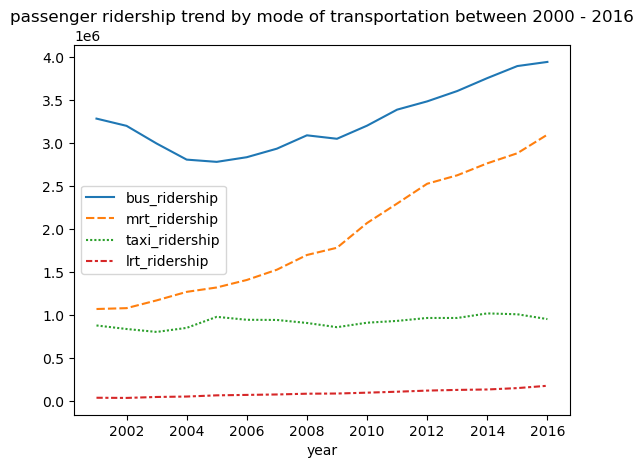

In [121]:
#5. Additional plots of your choosing.

#line plot showing the trend of each mode of transportation from 2001 to 2016
data_lines = rain_vs_publictransport_start2001[['year','bus_ridership','mrt_ridership', 'taxi_ridership', 'lrt_ridership']].set_index("year")
print(data_lines)

#plot sales of each store with custom colors
sns.lineplot(data=data_lines)
plt.title('passenger ridership trend by mode of transportation between 2000 - 2016') 
plt.show()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!

The objective of this report is to help audiences working in areas of public transport to be able forecast the demand on public transportation better, given by the number of rainy days and the rain volume, hence being able handling its capacity better, or even adjust for better services

In this report, we will address the problems of singapore in the following areas

What are the trends of public transport usage acorss mode of transportation? and What are the trends of rainy days and rain volume across the years?

Does the rainy days and rain volumes have impact on demand for public transport across mode of trasnportation?

What are recommendation possible from the finding above?

What are the trends of rainy days and rain volume across the years?
passenger ridership overall has increase year on year especially MRT and Bus, 
while rainy days, average rainvolume per day(mililitre), max rain volume in highest day (mililitre) has flat trend with some flutation 

Does the rainy days and rain volumes have impact on demand for public transport across mode of trasnportation?
rainy days and rain volumes has negative impact on demand for public transport across MRT, LRT, bus, and taxi, with heavy impact on MRT, LRT, and bus, and moderate impact on taxi. These difference in impact between mode of transportaion may come from taxi does not required walking distance compared to MRT, LRT, and bus. 

What are recommendation possible from the finding above?
as for recommendation, we suggest that.
 - operators of MRT, LRT, bus, and taxi should include rain forecast as part of features in transportatin demand prediction.
 - to perform better forecast, daily level data of rain and usage of public transportation are required. 
 - for operators to increase the demand for public transportation, the infrastruce to help prevent the rainfall along the walking distrance to train stations or bus stops are required. we can start this project by looking at the train station and bus stop with high demand during rainy season. or the operators can provide the sales of umbrella or raincoat during rainy season at the bus stops or train station. 